In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)
import seaborn as sns

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_22/'
training_data_df = pd.read_csv(basedir + 'training_data_ver_22.csv')
training_data_df['계약날짜'] = pd.to_datetime(training_data_df['계약날짜'])
training_data_df['지번주소'] = training_data_df['지번주소'] + '_' + training_data_df['건축년도'].apply(int).apply(str)
print(training_data_df.shape)
training_data_df.head()

(1471947, 307)
Wall time: 18.5 s


,지번주소,도로명주소,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,부동산유형,전용면적_classes,가격_면적,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,년,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),보전산지,보전임지,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지조성사업지역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,서울특별시 강남구 개포동 1264-3_1992,서울특별시 강남구 개포로31길 23-7,(1264-3),53.28,11500,1,1992.0,14.0,2006-08-29,1,10,215.840841,0,9,0.657534,-0.835925,-0.548843,735.633243,114,5167.325126,-8970.432841,1.335062e+07,4.023433e+07,-4.635314e+07,2006,3,4.761319,7,3,4,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,서울특별시 강남구 개포동 171-13_1988,서울특별시 강남구 선릉로14길 11-0,(171-13),68.08,56500,0,1988.0,18.0,2006-12-20,1,13,829.905993,0,9,0.967123,-0.205104,0.978740,363.965643,37,6236.633208,-8586.489321,1.944780e+07,3.686390e+07,-5.355078e+07,2006,3,5.201256,7,3,4,7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,

In [3]:
def landnum_modifier(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x).replace('외', '').replace(' ','')
        splitted = x.split('-')
        if len(splitted) == 1:
            return x + '-0'
        else:
            return x

In [4]:
def get_year(x):
    if pd.isna(x) == True:
        return x
    else:
        return int(x.split('.')[0])

In [5]:
def date_modifier(x):
    # x is a string or datetime
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if '-' in x:
            x = x.replace('-', '.')
            
        splitted = x.split('.')
        
        if len(splitted) == 1:
            return np.nan
        else:
            return x.split(' ')[0]

In [6]:
def get_bd_type(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        if '오피' in x:
            return '오피스텔'
        else:
            return '연립다세대'

In [7]:
reference_df = pd.read_excel('./감정평가사_자료/이승준_총괄표.xlsx', header=[0,1]).dropna(subset=[('소재지','소재지')]).sort_values([('소재지', '지역'),('소재지', '소재지'), ('소재지', '지번')]).reset_index(drop=True)
reference_df.columns = [col[0] + '_' + col[1] for col in reference_df.columns]
reference_df['소재지_지번'] = reference_df['소재지_지번'].apply(landnum_modifier)
reference_df['지번주소'] = '서울특별시 ' + reference_df['소재지_지역'] + ' ' + reference_df['소재지_소재지']\
+ ' ' + reference_df['소재지_지번']
reference_df['기준시점2'] = reference_df['수입/비용_기준시점'].apply(date_modifier)
reference_df['년'] = reference_df['기준시점2'].apply(get_year)
reference_df = reference_df.dropna(subset=['기준시점2'])
reference_df['건물유형'] = reference_df['건물내용_건물용도'].apply(get_bd_type)
reference_df['건축년도'] = reference_df['사업진행일자_사용승인일'].apply(str).str[:4]
reference_df['지번주소'] = reference_df['지번주소'] + '_' + reference_df['건축년도']
print(reference_df.shape)
reference_df.head()

(131, 44)


,소재지_지역,소재지_소재지,소재지_지번,토지내용_용도지역,토지내용_도로너비,토지내용_토지면적(㎡),토지내용_토지매매금액,토지내용_토지매매단가\n(원/㎡),토지내용_공시지가와격차\n(개공/매매),건물내용_건물용도,건물내용_공급면적(㎡),건물내용_전유면적(㎡),건물내용_전용율,건물내용_용적율\n(%),건물내용_건폐율\n(%),건물내용_구분건물호,건물내용_건물동수,건물내용_건물층수,수입/비용_의뢰인,수입/비용_기준시점,수입/비용_전체평가금액,수입/비용_투입비용합계,수입/비용_순이익,수입/비용_순이익율,평가단가(원/전유㎡) _전유면적,평가단가(원/전유㎡) _공급면적,매출원가(원/전유㎡) _전유면적기준,매출원가(원/전유㎡) _공급면적기준,사업진행일자_토지계약일자,사업진행일자_허가일자,사업진행일자_착공일자,사업진행일자_사용승인일,건축비\n(원/평)_Unnamed: 32_level_1,원가비율_토지원가비율,원가비율_건축원가비율,원가비율_부대비용,원가비율_금융비용,원가비율_합계,비고_Unnamed: 38_level_1,지번주소,기준시점2,년,건물유형,건축년도
0,강남구,개포동,1195-10,2종일주,6미터,265.7,2.970000e+09,11178020.0,0.433,다세대주택,519.54,432.22,0.832,195.54,59.62,15개호,1개동,지상5층,SH공사,2020.09.23,4.719500e+09,4.167814e+09,5.516858e+08,0.117,10919208.0,9.083997e+06,9.642807e+06,8372395.0,2019.02.26,2019.06.18,2019.06.18,2020.01.13,5500000.0,0.7563,0.2139,0.0060,0.0239,1.0,NaN,서울특별시 강남구 개포동 1195-10_2020,2020.09.23,2020,연립다세대,2020
1,강남구,개포동,1199-7,2종일주,4미터,248.0,2.550000e+09,10282258.0,0.365,다세대주택,463.84,390.67,0.842,187.04,59.61,14개호,1개동,지상5층,LH공사,2019.11.29,4.040000e+09,3.593249e+09,4.467511e+08,0.111,10341209.0,8.709524e+06,9.197658e+06,8074624.0,2018.08.21,2018.12.31,2019.01.07,2019.06.04,5400000.0,0.7520,0.2175,0.0061,0.0244,1.0,NaN,서울특별시 강남구 개포동 1199-7_2019,2019.11.29,2019,연립다세대,2019
2,강남구,개포동,1216-7,2종일주,8미터,258.1,2.931000e+09,11356064.0,0.472,도시행생활주택,489.46,400.29,0.818,199.62,59.89,15개호,1개동,지상5층,SH공사,2019.11.29,4.586000e+09,4.054965e+09,5.310348e+08,0.116,11456694.0,9.369509e+06,1.013007e+07,8312283.0,2019.01.24,2019.06.17,2019.07.23,2020.02.25,5400000.0,0.7667,0.2034,0.0057,0.0242,1.0,NaN,서울특별시 강남구 개포동 1216-7_2020,2019.11.29,2019,연립다세대,2020
3,강남구,역삼동,707-9,일반상업,8미터,363.5,9.500000e+09,26134801.0,0.580,도시행생활주택,1695.85,1289.62,0.760,199.62,59.89,15개호,1개동,지상5층,LH공사,2019.11.29,2.219983e+10,1.398811e+10,8.211721e+09,0.370,17214239.0,1.115945e+07,1.084669e+07,16602582.0,2019.08.14,2019.07.15,2020.01.03,2020.10.07,5800000.0,0.7189,0.2568,0.0072,0.0170,1.0,NaN,서울특별시 강남구 역삼동 707-9_2020,2019.11.29,2019,연립다세대,2020
4,강남구,역삼동,751-6,2종일주,6미터,391.8,5.900000e+09,15058703.0,0.441,도시행생활주택,658.88,537.65,0.816,168.17,46.35,20개호,1개동,지상6층,LH공사,2019.11.29,9.810500e+09,7.604511e+09,2.205989e+09,0.225,18247001.0,1.488966e+07,1.414398e+07,12107552.0,2019.01.04,2019.03.05,2019.04.20,2019.11.29,5500000.0,0.8249,0.1486,0.0042,0.0223,1.0,NaN,서울특별시 강남구 역삼동 751-6_2019,2019.11.29,2019,연립다세대,2019


In [8]:
training_data_df = training_data_df[training_data_df['지번주소'].isin(reference_df['지번주소'].unique()) == False].reset_index(drop=True)
print(training_data_df.shape)

(1471004, 307)


In [9]:
training_data_df.isna().sum()

지번주소                        0
도로명주소                       0
건물(단지)명                     0
전용면적(㎡)                     0
거래금액(만원)                    0
층                           0
건축년도                        0
계약날짜기준_건물연식                 0
계약날짜                        0
부동산유형                       0
전용면적_classes                0
가격_면적                       0
구                           0
동                           0
year_linear                 0
year_sin                    0
year_cos                    0
distance_nearest_station    0
nearest_station_name        0
xnorm                       0
ynorm                       0
x_2nd                       0
y_2nd                       0
xy                          0
년                           0
지목명                         0
토지면적_log                    0
용도지역명1                      0
토지이동상황                      0
지형높이                        0
지형형상                        0
도로접면                        0
(한강)오염행위_제한지역               0
(한강)폐기물매립시

<AxesSubplot:>

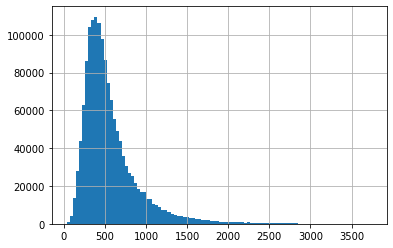

In [10]:
training_data_df['가격_면적'].hist(bins=100)

In [11]:
def price_over_area_feature_engi(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(200):
            if x < ((i+1)*15):
                return '{}~{}'.format((i*15), (i+1)*15)
        
        return '3000초과'

In [12]:
training_data_df['가격_면적_classes'] = training_data_df['가격_면적'].apply(price_over_area_feature_engi)

In [13]:
price_area_classes_list = []
for i in range(200):
    price_area_classes_list.append('{}~{}'.format((i*15), (i+1)*15))
price_area_classes_list.append('3000초과')

In [14]:
print(len(price_area_classes_list))

201


In [15]:
reference_unique_values_list = training_data_df['가격_면적_classes'].unique().tolist()
print(len(reference_unique_values_list))

199


In [16]:
v_to_drop = []
for v in price_area_classes_list:
    if v not in reference_unique_values_list:
        v_to_drop.append(v)

In [17]:
v_to_drop

['0~15', '15~30']

In [18]:
for v in v_to_drop:
    price_area_classes_list.remove(v)

In [19]:
print(len(price_area_classes_list))

199


In [20]:
col_map = {}
col_map_df = pd.DataFrame({'cat':price_area_classes_list,
                           'map':[i for i in range(len(price_area_classes_list))]})
for i in range(col_map_df.shape[0]):
    col_map[col_map_df['cat'][i]] = col_map_df['map'][i]
training_data_df['가격_면적_classes'] = training_data_df['가격_면적_classes'].map(col_map)
col_map_df.to_csv('./Training/training_data_ver_22/feature_maps/가격_면적_classes_map.csv')

In [21]:
col_map_df.shape

(199, 2)

In [22]:
training_data_df['가격_면적_classes'].nunique()

199

In [23]:
training_data_df['가격_면적_classes'].value_counts()

25     45298
23     45142
24     44393
21     44120
20     43421
22     43336
19     42415
26     41890
27     41801
18     41241
28     39116
29     39057
17     37544
30     36793
31     36227
16     34337
32     32989
33     31605
15     30394
34     29449
35     27222
14     26697
36     25694
37     24693
38     23911
13     22318
39     22146
40     20525
12     19970
41     19831
42     17998
45     17535
43     17233
44     17095
11     16841
10     14377
46     13381
47     13313
48     13067
49     11982
9      11777
50     11387
52     10968
51     10817
53     10145
56      9393
8       9389
54      9290
55      8768
58      7565
60      7435
57      7381
64      7277
59      7202
7       6830
63      6524
68      6315
62      6292
61      6291
65      5321
67      5300
66      5055
6       4596
70      4579
72      4435
69      4266
71      4107
73      3864
74      3747
75      3716
76      3547
78      3188
80      3067
79      2941
81      2846
5       2832
77      2684

In [24]:
cols_to_drop = ['지번주소', '도로명주소', '건물(단지)명', '전용면적(㎡)', '거래금액(만원)', '계약날짜', '가격_면적', '년', '가격_면적_classes']

# Training

In [25]:
from sklearn.model_selection import KFold, GroupKFold, GroupShuffleSplit

In [26]:
from catboost import CatBoostClassifier, Pool

In [27]:
from sklearn.metrics import r2_score

In [28]:
gkf = GroupKFold(n_splits=5)

In [29]:
from sklearn.metrics import mean_squared_error, log_loss

In [30]:
target_cols = ['가격_면적_classes']

In [31]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')
cat_cols_df

,colname
0,부동산유형
1,구
2,동
3,nearest_station_name
4,층
5,지목명
6,용도지역명1
7,토지이동상황
8,지형높이
9,지형형상


In [32]:
cat_cols = cat_cols_df['colname'].tolist()
cat_cols

['부동산유형',
 '구',
 '동',
 'nearest_station_name',
 '층',
 '지목명',
 '용도지역명1',
 '토지이동상황',
 '지형높이',
 '지형형상',
 '도로접면',
 '전용면적_classes',
 '(한강)오염행위_제한지역',
 '(한강)폐기물매립시설_설치제한지역',
 '4대문안',
 '가로구역별_최고높이_제한지역',
 '가스공급설비',
 '가축사육제한구역',
 '개발제한구역',
 '개발진흥지구',
 '개발행위허가제한지역',
 '건축선',
 '건축용도지역기타',
 '건축용도지역미분류',
 '건축허가_착공제한지역',
 '경관광장',
 '경관녹지',
 '경관지구',
 '경관지구기타',
 '고도지구',
 '고등학교',
 '고속철도',
 '공공공지',
 '공공도서관',
 '공공문화체육시설미분류',
 '공공시설구역',
 '공공주택지구',
 '공공지원민간임대주택_공급촉진지구',
 '공공청사',
 '공용시설보호지구',
 '공원',
 '공원마을지구(공원집단시설지구)',
 '공원자연보존지구',
 '공원자연환경지구',
 '공익용산지',
 '공익임지',
 '공장설립승인지역',
 '공장설립제한지역',
 '공항소음피해예상지역',
 '공항시설보호지구',
 '과밀억제권역',
 '광로1류(폭_70M_이상)',
 '광로2류(폭_50M_70M)',
 '광로3류(폭_40M_50M)',
 '광역계획구역',
 '광장',
 '교육환경보호구역',
 '교통광장',
 '국가산업단지',
 '국가지정문화재구역',
 '국가하천',
 '국립공원',
 '국민임대주택단지예정지구',
 '국지도로',
 '국토이용용도지구기타',
 '근린공원',
 '근린광장',
 '근린상업지역',
 '기타공공공지시설',
 '기타공원시설',
 '기타교통시설',
 '기타녹지시설',
 '기타도로시설',
 '기타도시공간시설',
 '기타문화시설',
 '기타보건위생시설',
 '기타수도시설',
 '기타시장시설',
 '기타용도지역지구기타',
 '기타용지',
 '기타유통업무설비',
 '기타자동차정류장',
 '기타주차장시설

Fold 0 start
creating fold data...
(1176803, 299)


,층,건축년도,계약날짜기준_건물연식,부동산유형,전용면적_classes,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),보전산지,보전임지,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지조성사업지역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,0,1993.0,22.0,0,27,8,338,9.912329,-0.523416,0.852078,882.097153,311,7694.109824,8834.277327,2.959966e+07,3.902223e+07,6.797190e+07,3,10.37494,9,9,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0


199
y dist plot


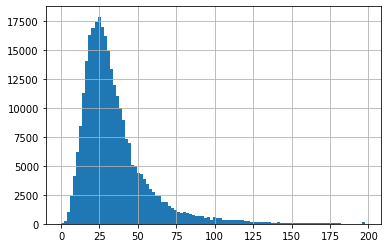

creating model...
start training...
0:	learn: 4.4220447	test: 4.4671487	best: 4.4671487 (0)	total: 4.67s	remaining: 2d 16h 48m 9s
25:	learn: 3.4623575	test: 3.5663981	best: 3.5663981 (25)	total: 1m 59s	remaining: 2d 15h 59m 38s
50:	learn: 3.3539082	test: 3.4929538	best: 3.4929538 (50)	total: 3m 52s	remaining: 2d 15h 14m 10s
75:	learn: 3.2920833	test: 3.4497259	best: 3.4497259 (75)	total: 5m 44s	remaining: 2d 14h 57m 3s
100:	learn: 3.2557633	test: 3.4283993	best: 3.4283993 (100)	total: 7m 36s	remaining: 2d 14h 39m 27s
125:	learn: 3.2141382	test: 3.4010543	best: 3.4010543 (125)	total: 9m 29s	remaining: 2d 14h 34m 4s
150:	learn: 3.1951049	test: 3.3878182	best: 3.3877438 (149)	total: 11m 20s	remaining: 2d 14h 22m 8s
175:	learn: 3.1746643	test: 3.3706588	best: 3.3706588 (175)	total: 13m 11s	remaining: 2d 14h 15m 30s
200:	learn: 3.0908321	test: 3.3202598	best: 3.3202598 (200)	total: 15m 7s	remaining: 2d 14h 26m 48s
225:	learn: 3.0322376	test: 3.2936853	best: 3.2936853 (225)	total: 17m 2s	rem

,층,건축년도,계약날짜기준_건물연식,부동산유형,전용면적_classes,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),보전산지,보전임지,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지조성사업지역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,0,1982.0,34.0,0,10,0,9,10.676712,-0.895839,-0.444378,880.501694,14,7008.0416,-8564.451364,2.455632e+07,3.667491e+07,-6.002003e+07,3,11.976296,7,9,4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


199
y dist plot


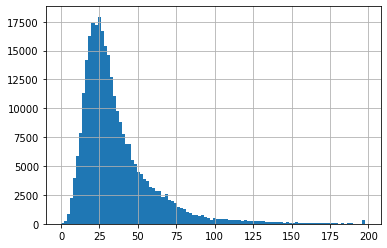

creating model...
start training...
0:	learn: 4.4193829	test: 4.4646020	best: 4.4646020 (0)	total: 5.14s	remaining: 2d 23h 20m 9s
25:	learn: 3.4474249	test: 3.5787752	best: 3.5787752 (25)	total: 2m 12s	remaining: 2d 22h 39m 48s
50:	learn: 3.3357102	test: 3.4961024	best: 3.4961024 (50)	total: 4m 17s	remaining: 2d 21h 59m 13s
75:	learn: 3.2878105	test: 3.4615779	best: 3.4615779 (75)	total: 6m 20s	remaining: 2d 21h 26m 43s
100:	learn: 3.2382878	test: 3.4228227	best: 3.4228227 (100)	total: 8m 24s	remaining: 2d 21h 15m 18s
125:	learn: 3.2124470	test: 3.4031406	best: 3.4031406 (125)	total: 10m 27s	remaining: 2d 21h 48s
150:	learn: 3.1891755	test: 3.3870617	best: 3.3870617 (150)	total: 12m 31s	remaining: 2d 20h 52m 7s
175:	learn: 3.1770840	test: 3.3787209	best: 3.3787209 (175)	total: 14m 32s	remaining: 2d 20h 36m 41s
200:	learn: 3.0963847	test: 3.3273549	best: 3.3273549 (200)	total: 16m 38s	remaining: 2d 20h 43m 43s
225:	learn: 3.0274167	test: 3.2855745	best: 3.2855745 (225)	total: 18m 46s	re

,층,건축년도,계약날짜기준_건물연식,부동산유형,전용면적_classes,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),보전산지,보전임지,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지조성사업지역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,0,2019.0,1.0,0,9,9,128,14.320548,0.903356,-0.428892,1021.808574,130,4081.39647,11054.769204,8.328899e+06,6.110396e+07,4.511890e+07,3,7.755553,7,9,4,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


199
y dist plot


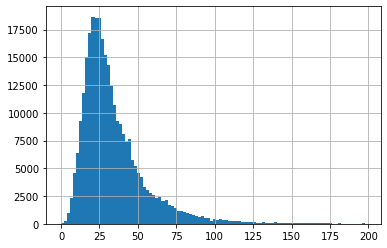

creating model...
start training...
0:	learn: 4.4220205	test: 4.4409311	best: 4.4409311 (0)	total: 5.25s	remaining: 3d 58m 4s
25:	learn: 3.4629515	test: 3.5462762	best: 3.5462762 (25)	total: 2m 10s	remaining: 2d 21h 36m 26s
50:	learn: 3.3622148	test: 3.4799049	best: 3.4799049 (50)	total: 4m 13s	remaining: 2d 20h 54m 42s
75:	learn: 3.2997702	test: 3.4392635	best: 3.4392635 (75)	total: 6m 16s	remaining: 2d 20h 39m 34s
100:	learn: 3.2533321	test: 3.4020406	best: 3.4020406 (100)	total: 8m 18s	remaining: 2d 20h 22m 41s
125:	learn: 3.2189708	test: 3.3794538	best: 3.3794538 (125)	total: 10m 20s	remaining: 2d 20h 15m 14s
150:	learn: 3.2032842	test: 3.3705530	best: 3.3705530 (150)	total: 12m 16s	remaining: 2d 19h 33m 50s
175:	learn: 3.1794355	test: 3.3528119	best: 3.3528119 (175)	total: 14m 8s	remaining: 2d 18h 45m 24s
200:	learn: 3.0945562	test: 3.2920151	best: 3.2920151 (200)	total: 16m 4s	remaining: 2d 18h 21m 16s
225:	learn: 3.0291644	test: 3.2601030	best: 3.2601030 (225)	total: 17m 59s	rem

,층,건축년도,계약날짜기준_건물연식,부동산유형,전용면적_classes,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),보전산지,보전임지,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지조성사업지역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,0,2015.0,0.0,1,5,4,198,9.50137,-0.008607,-0.999963,319.671969,204,-5219.108473,-8197.823524,1.361955e+07,3.360216e+07,4.278533e+07,3,5.469746,11,13,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


199
y dist plot


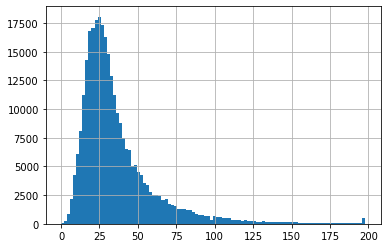

creating model...
start training...
0:	learn: 4.4146918	test: 4.4656651	best: 4.4656651 (0)	total: 4.68s	remaining: 2d 16h 57m 32s
25:	learn: 3.4482534	test: 3.5592641	best: 3.5592641 (25)	total: 1m 59s	remaining: 2d 15h 36m 5s
50:	learn: 3.3473844	test: 3.4851014	best: 3.4851014 (50)	total: 3m 51s	remaining: 2d 14h 55m 50s
75:	learn: 3.2903466	test: 3.4416445	best: 3.4416445 (75)	total: 5m 43s	remaining: 2d 14h 37m 30s
100:	learn: 3.2514569	test: 3.4141335	best: 3.4141335 (100)	total: 7m 34s	remaining: 2d 14h 23m 5s
125:	learn: 3.2204466	test: 3.3951610	best: 3.3951287 (124)	total: 9m 25s	remaining: 2d 14h 13m 16s
150:	learn: 3.2023414	test: 3.3821240	best: 3.3821240 (150)	total: 11m 16s	remaining: 2d 14h 2m 10s
175:	learn: 3.1824309	test: 3.3685427	best: 3.3685427 (175)	total: 13m 7s	remaining: 2d 13h 55m 48s
200:	learn: 3.1045183	test: 3.3211193	best: 3.3211193 (200)	total: 15m 2s	remaining: 2d 14h 5m 54s
225:	learn: 3.0420034	test: 3.2867000	best: 3.2866748 (224)	total: 16m 57s	rem

bestTest = 3.189623973
bestIteration = 1893
Shrink model to first 1894 iterations.
saving model...
Fold 3 end
Fold 4 start
creating fold data...
(1176804, 299)


,층,건축년도,계약날짜기준_건물연식,부동산유형,전용면적_classes,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),보전산지,보전임지,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지조성사업지역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,0,1991.0,19.0,1,8,7,77,4.961644,-0.238673,0.9711,1140.828348,35,-7342.40206,-9393.231898,2.695543e+07,4.411640e+07,6.896889e+07,3,5.365041,5,3,4,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


199
y dist plot


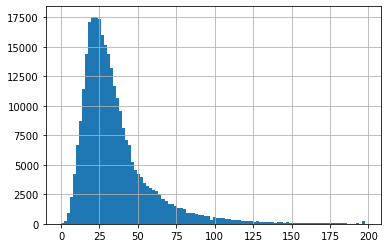

creating model...
start training...
0:	learn: 4.4170389	test: 4.4665657	best: 4.4665657 (0)	total: 4.64s	remaining: 2d 16h 25m 49s
25:	learn: 3.4491417	test: 3.5837916	best: 3.5837916 (25)	total: 1m 59s	remaining: 2d 15h 34m 3s
50:	learn: 3.3577414	test: 3.5164996	best: 3.5164996 (50)	total: 3m 50s	remaining: 2d 14h 41m 48s
75:	learn: 3.2926333	test: 3.4631422	best: 3.4631422 (75)	total: 5m 42s	remaining: 2d 14h 30m 26s
100:	learn: 3.2538139	test: 3.4347986	best: 3.4347986 (100)	total: 7m 34s	remaining: 2d 14h 19m 48s
125:	learn: 3.2285578	test: 3.4144887	best: 3.4144887 (125)	total: 9m 25s	remaining: 2d 14h 8m 40s
150:	learn: 3.2082275	test: 3.4009439	best: 3.4009439 (150)	total: 11m 15s	remaining: 2d 13h 58m 18s
175:	learn: 3.1905358	test: 3.3858831	best: 3.3858810 (174)	total: 13m 6s	remaining: 2d 13h 50m 43s
200:	learn: 3.1105261	test: 3.3386882	best: 3.3386882 (200)	total: 15m	remaining: 2d 13h 59m 21s
225:	learn: 3.0380856	test: 3.3002923	best: 3.3002923 (225)	total: 16m 56s	rema

<Figure size 432x288 with 0 Axes>

In [33]:
count = 0
oof = np.zeros((training_data_df.shape[0],200))

for train_idx, val_idx in gkf.split(training_data_df, groups=training_data_df['지번주소']):
    print('Fold {} start'.format(count))
    
    print('creating fold data...')
    train_data = training_data_df.loc[train_idx].sample(frac=1).reset_index(drop=True)
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=cols_to_drop)
    y_train = train_data['가격_면적_classes']
    
    print(x_train.shape)
    display(x_train.head(1))
    
    x_val = val_data.drop(columns=cols_to_drop)
    y_val = val_data['가격_면적_classes']
    
    print(y_train.nunique())
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    print('creating model...')
    train_pool = Pool(x_train, y_train, cat_features=cat_cols)
    val_pool = Pool(x_val, y_val, cat_features=cat_cols)
    
    model = CatBoostClassifier(iterations=50000, learning_rate=0.3, loss_function='MultiClass', custom_metric='MultiClass',
                               classes_count=199, thread_count=6, task_type='GPU'
                              )
     
    print('start training...')
    model.fit(train_pool, use_best_model=True, eval_set=val_pool, verbose=25, early_stopping_rounds=100)
    
    print('saving model...')
    model.save_model(basedir + 'catboost_multiclass_{}'.format(count))
    
    print('Fold {} end'.format(count))
    count += 1

Fold 0 start
creating fold data...
(1176803, 299)
199
y dist plot


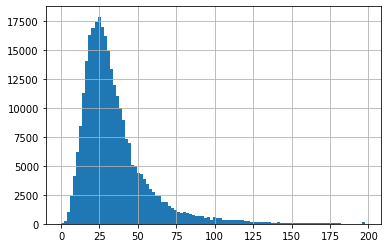

creating model...
start training...


Found only 199 unique classes in the data, but have defined 200 classes. Probably something is wrong with data.


0:	learn: 4.9304986	test: 4.9433228	best: 4.9433228 (0)	total: 4.67s	remaining: 2d 16h 54m 43s
25:	learn: 3.7846560	test: 3.8368573	best: 3.8368573 (25)	total: 1m 58s	remaining: 2d 15h 6m 27s
50:	learn: 3.5680003	test: 3.6396086	best: 3.6396086 (50)	total: 3m 51s	remaining: 2d 14h 52m 20s
75:	learn: 3.4801621	test: 3.5649335	best: 3.5649335 (75)	total: 5m 43s	remaining: 2d 14h 39m 39s
100:	learn: 3.4319941	test: 3.5249528	best: 3.5249528 (100)	total: 7m 35s	remaining: 2d 14h 28m 30s
125:	learn: 3.3870180	test: 3.4893559	best: 3.4893559 (125)	total: 9m 27s	remaining: 2d 14h 24m 5s
150:	learn: 3.3592572	test: 3.4670856	best: 3.4670856 (150)	total: 11m 19s	remaining: 2d 14h 16m 46s
175:	learn: 3.3311812	test: 3.4441226	best: 3.4441226 (175)	total: 13m 11s	remaining: 2d 14h 14m 32s
200:	learn: 3.3074268	test: 3.4239480	best: 3.4239480 (200)	total: 15m 3s	remaining: 2d 14h 10m 52s
225:	learn: 3.2358517	test: 3.3765083	best: 3.3765083 (225)	total: 17m	remaining: 2d 14h 24m 6s
250:	learn: 3.1

2000:	learn: 2.8033503	test: 3.1787124	best: 3.1786362 (1993)	total: 2h 29m 21s	remaining: 2d 11h 42m 48s
2025:	learn: 2.8010054	test: 3.1785200	best: 3.1785200 (2025)	total: 2h 31m 13s	remaining: 2d 11h 40m 50s
2050:	learn: 2.7995191	test: 3.1783407	best: 3.1783407 (2050)	total: 2h 33m 4s	remaining: 2d 11h 38m 36s
2075:	learn: 2.7974697	test: 3.1783368	best: 3.1783368 (2075)	total: 2h 34m 55s	remaining: 2d 11h 36m 34s
2100:	learn: 2.7956805	test: 3.1771433	best: 3.1771433 (2100)	total: 2h 36m 47s	remaining: 2d 11h 34m 25s
2125:	learn: 2.7940405	test: 3.1767915	best: 3.1767915 (2125)	total: 2h 38m 38s	remaining: 2d 11h 32m 20s
2150:	learn: 2.7916548	test: 3.1764109	best: 3.1764004 (2149)	total: 2h 40m 30s	remaining: 2d 11h 30m 28s
2175:	learn: 2.7902705	test: 3.1759144	best: 3.1758827 (2170)	total: 2h 42m 21s	remaining: 2d 11h 28m 14s
2200:	learn: 2.7888880	test: 3.1755288	best: 3.1755201 (2198)	total: 2h 44m 12s	remaining: 2d 11h 25m 58s
2225:	learn: 2.7876849	test: 3.1753151	best: 3.

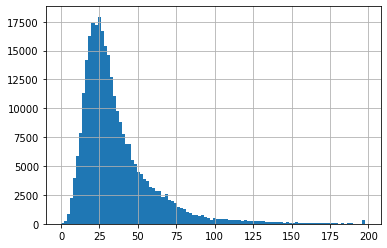

creating model...
start training...


Found only 199 unique classes in the data, but have defined 200 classes. Probably something is wrong with data.


0:	learn: 4.9278805	test: 4.9421977	best: 4.9421977 (0)	total: 4.67s	remaining: 2d 16h 55m 55s
25:	learn: 3.7734939	test: 3.8489217	best: 3.8489217 (25)	total: 1m 58s	remaining: 2d 15h 13m 35s
50:	learn: 3.5586579	test: 3.6554609	best: 3.6554609 (50)	total: 3m 51s	remaining: 2d 14h 59m 53s
75:	learn: 3.4689638	test: 3.5816559	best: 3.5816559 (75)	total: 5m 44s	remaining: 2d 14h 50m 1s
100:	learn: 3.4192654	test: 3.5397813	best: 3.5397813 (100)	total: 7m 36s	remaining: 2d 14h 41m 10s
125:	learn: 3.3820943	test: 3.5098324	best: 3.5098324 (125)	total: 9m 28s	remaining: 2d 14h 30m 57s
150:	learn: 3.3564284	test: 3.4888509	best: 3.4888509 (150)	total: 11m 20s	remaining: 2d 14h 23m 7s
175:	learn: 3.3326353	test: 3.4692940	best: 3.4692940 (175)	total: 13m 12s	remaining: 2d 14h 19m 3s
200:	learn: 3.3069250	test: 3.4471966	best: 3.4471966 (200)	total: 15m 5s	remaining: 2d 14h 17m 17s
225:	learn: 3.2412560	test: 3.3981156	best: 3.3981156 (225)	total: 17m 1s	remaining: 2d 14h 27m 49s
250:	learn: 

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [34]:
count = 0
oof = np.zeros((training_data_df.shape[0],200))

for train_idx, val_idx in gkf.split(training_data_df, groups=training_data_df['지번주소']):
    print('Fold {} start'.format(count))
    
    print('creating fold data...')
    train_data = training_data_df.loc[train_idx].sample(frac=1).reset_index(drop=True)
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=cols_to_drop)
    y_train = train_data['가격_면적_classes']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=cols_to_drop)
    y_val = val_data['가격_면적_classes']
    
    print(y_train.nunique())
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    print('creating model...')
    train_pool = Pool(x_train, y_train, cat_features=cat_cols)
    val_pool = Pool(x_val, y_val, cat_features=cat_cols)
    
    model = CatBoostClassifier(iterations=50000, learning_rate=0.1, loss_function='MultiClass', custom_metric='MultiClass',
                               classes_count=200, thread_count=6, task_type='GPU'
                              )
     
    print('start training...')
    model.fit(train_pool, use_best_model=True, eval_set=val_pool, verbose=25, early_stopping_rounds=100)
    
    print('saving model...')
    model.save_model(basedir + 'catboost_multiclass_lower_lr_{}'.format(count))
    
    print('Fold {} end'.format(count))
    count += 1